# Gender Classification of Twitter Dataset 

## History - 

This data set was used to train a CrowdFlower AI gender predictor. Contributors were asked to simply view a Twitter profile and judge whether the user was a male, a female, or a brand (non-individual). The dataset contains 20,000 rows, each with a user name, a random tweet, account profile and image, location, and even link and sidebar color.

In [11]:
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sns

tweet=pd.read_csv("/data/genderclassification.csv",encoding='latin1')
tweet.head(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade


Cleaning data, that is removing HTML, Hashtags, Co, puntuations etc

In [12]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

tweet['Tweets'] = [cleaning(s) for s in tweet['text']]
tweet['Description'] = [cleaning(s) for s in tweet['description']]

stop = set(stopwords.words('english'))
tweet['Tweets_stop'] = tweet['Tweets'].str.lower().str.split()
tweet['Tweets_stop'] = tweet['Tweets'].apply(lambda x : [item for item in x if item not in stop])


Seeing Popular words used by males, females and Brands

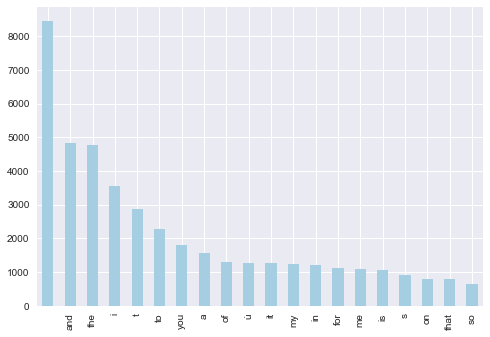

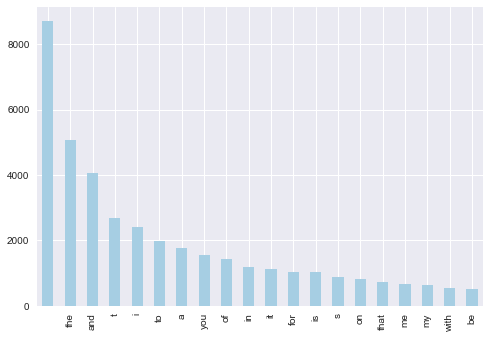

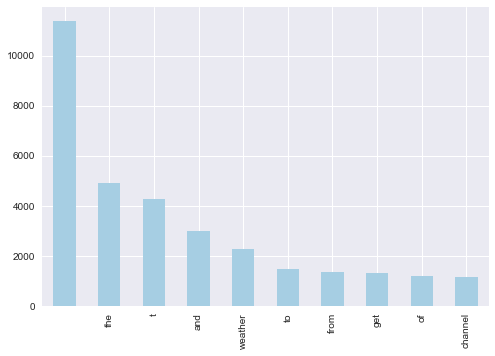

In [13]:
tweet.gender.value_counts()
Male = tweet[tweet['gender'] == 'male']
Female = tweet[tweet['gender'] == 'female']
Brand = tweet[tweet['gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['Tweets'].astype(str)).lower().split(" ")).value_counts()[:10]
Female_Words
Female_Words.plot(kind='bar',stacked=True, colormap='Paired')
plt.show()
Male_Words
Male_Words.plot(kind='bar',stacked=True, colormap='Paired')
plt.show()
Brand_words
Brand_words.plot(kind='bar',stacked=True, colormap='Paired')
plt.show()


Removing all those records in which the gender confidence is less than 100%, which is approximately about 30% data.

In [14]:
gold_values = defaultdict(int)
for val in tweet._golden:
    gold_values[val] += 1
print(gold_values)

print(np.any(np.isnan(tweet['gender:confidence'])))
gender_confidence = tweet['gender:confidence'][np.where(np.invert(np.isnan(tweet['gender:confidence'])))[0]]
print(len(gender_confidence))
gender_nonones = gender_confidence[np.where(gender_confidence < 1)[0]]
print(len(gender_nonones))

tweet_confident = tweet[tweet['gender:confidence']==1]
tweet_confident.shape

defaultdict(<class 'int'>, {False: 20000, True: 50})
True
20024
6098


(13926, 29)

Running Naves Bayes Algorithm and using it to predict on test data to calculate its efficiency 

In [15]:
tweet['all_features'] = tweet['Tweets'].str.cat(tweet['Description'], sep=' ')

tweet_confident = tweet[tweet['gender:confidence']==1]
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(tweet_confident['Tweets'])

encoder = LabelEncoder()
y = encoder.fit_transform(tweet_confident['gender'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nb = MultinomialNB()
nb.fit(x_train, y_train)

print("The efficiency we get by running this algorithm is - ",nb.score(x_test, y_test)*100,"%")

The efficiency we get by running this algorithm is -  57.1069633884 %


In [ ]:
print('continue')